In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset=pd.read_csv('AAPL.csv')
x=dataset.iloc[:,1:2]

In [3]:
print(dataset)

             Date        Open        High         Low       Close   Adj Close  \
0      1980-12-12    0.128348    0.128906    0.128348    0.128348    0.100178   
1      1980-12-15    0.122210    0.122210    0.121652    0.121652    0.094952   
2      1980-12-16    0.113281    0.113281    0.112723    0.112723    0.087983   
3      1980-12-17    0.115513    0.116071    0.115513    0.115513    0.090160   
4      1980-12-18    0.118862    0.119420    0.118862    0.118862    0.092774   
...           ...         ...         ...         ...         ...         ...   
10463  2022-06-13  132.869995  135.199997  131.440002  131.880005  131.880005   
10464  2022-06-14  133.130005  133.889999  131.479996  132.759995  132.759995   
10465  2022-06-15  134.289993  137.339996  132.160004  135.429993  135.429993   
10466  2022-06-16  132.080002  132.389999  129.039993  130.059998  130.059998   
10467  2022-06-17  130.070007  133.080002  129.809998  131.559998  131.559998   

          Volume  
0      4

In [4]:
print(x)

             Open
0        0.128348
1        0.122210
2        0.113281
3        0.115513
4        0.118862
...           ...
10463  132.869995
10464  133.130005
10465  134.289993
10466  132.080002
10467  130.070007

[10468 rows x 1 columns]


In [7]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler(feature_range=(0,1))
x_scaled=sc.fit_transform(x)

In [8]:
print(x_scaled)

[[4.30950014e-04]
 [3.97331936e-04]
 [3.48427437e-04]
 ...
 [7.35239774e-01]
 [7.23135563e-01]
 [7.12126738e-01]]


In [10]:
x_train = []
y_train = []
for i in range(60, 10000):
    x_train.append(x_scaled[i-60:i, 0])
    y_train.append(x_scaled[i, 0])
x_train, y_train = np.array(x_train), np.array(y_train)

In [11]:
x_train

array([[4.30950014e-04, 3.97331936e-04, 3.48427437e-04, ...,
        3.60652193e-04, 3.08696982e-04, 2.81185806e-04],
       [3.97331936e-04, 3.48427437e-04, 3.60652193e-04, ...,
        3.08696982e-04, 2.81185806e-04, 2.62848673e-04],
       [3.48427437e-04, 3.60652193e-04, 3.78994803e-04, ...,
        2.81185806e-04, 2.62848673e-04, 2.78129617e-04],
       ...,
       [4.34919948e-01, 4.27142555e-01, 4.16681429e-01, ...,
        5.92343798e-01, 5.97451155e-01, 5.98793041e-01],
       [4.27142555e-01, 4.16681429e-01, 4.10985307e-01, ...,
        5.97451155e-01, 5.98793041e-01, 6.04420684e-01],
       [4.16681429e-01, 4.10985307e-01, 4.28539228e-01, ...,
        5.98793041e-01, 6.04420684e-01, 6.19756415e-01]])

In [12]:
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

In [13]:
x_train

array([[[4.30950014e-04],
        [3.97331936e-04],
        [3.48427437e-04],
        ...,
        [3.60652193e-04],
        [3.08696982e-04],
        [2.81185806e-04]],

       [[3.97331936e-04],
        [3.48427437e-04],
        [3.60652193e-04],
        ...,
        [3.08696982e-04],
        [2.81185806e-04],
        [2.62848673e-04]],

       [[3.48427437e-04],
        [3.60652193e-04],
        [3.78994803e-04],
        ...,
        [2.81185806e-04],
        [2.62848673e-04],
        [2.78129617e-04]],

       ...,

       [[4.34919948e-01],
        [4.27142555e-01],
        [4.16681429e-01],
        ...,
        [5.92343798e-01],
        [5.97451155e-01],
        [5.98793041e-01]],

       [[4.27142555e-01],
        [4.16681429e-01],
        [4.10985307e-01],
        ...,
        [5.97451155e-01],
        [5.98793041e-01],
        [6.04420684e-01]],

       [[4.16681429e-01],
        [4.10985307e-01],
        [4.28539228e-01],
        ...,
        [5.98793041e-01],
        [6.0442

In [14]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [16]:
regressor=Sequential()

In [18]:
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
regressor.add(Dropout(0.2))

In [19]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [20]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [21]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

In [22]:
regressor.add(Dense(units =1))

In [23]:
regressor.compile(optimizer='adam',loss='mean_squared_error')

In [25]:
regressor.fit(x_train,y_train,epochs=100,batch_size=100)

Epoch 1/100
100/100 [==============================] - 28s 191ms/step - loss: 7.0499e-04
Epoch 2/100
100/100 [==============================] - 17s 173ms/step - loss: 2.1097e-04
Epoch 3/100
100/100 [==============================] - 17s 175ms/step - loss: 1.7761e-04
Epoch 4/100
100/100 [==============================] - 19s 186ms/step - loss: 1.8452e-04
Epoch 5/100
100/100 [==============================] - 18s 175ms/step - loss: 1.4108e-04
Epoch 6/100
100/100 [==============================] - 21s 205ms/step - loss: 1.4418e-04
Epoch 7/100
100/100 [==============================] - 21s 208ms/step - loss: 1.5107e-04
Epoch 8/100
100/100 [==============================] - 21s 206ms/step - loss: 1.3820e-04
Epoch 9/100
100/100 [==============================] - 20s 197ms/step - loss: 1.2868e-04
Epoch 10/100
100/100 [==============================] - 18s 184ms/step - loss: 1.1628e-04
Epoch 11/100
100/100 [==============================] - 18s 178ms/step - loss: 1.2937e-04
Epoch 12/100
100/10

100/100 [==============================] - 23s 225ms/step - loss: 7.1603e-05
Epoch 93/100
100/100 [==============================] - 23s 227ms/step - loss: 8.4178e-05
Epoch 94/100
100/100 [==============================] - 21s 206ms/step - loss: 7.5531e-05
Epoch 95/100
100/100 [==============================] - 20s 201ms/step - loss: 7.1620e-05
Epoch 96/100
100/100 [==============================] - 25s 246ms/step - loss: 8.2347e-05
Epoch 97/100
100/100 [==============================] - 21s 210ms/step - loss: 8.0301e-05
Epoch 98/100
100/100 [==============================] - 18s 184ms/step - loss: 8.3165e-05
Epoch 99/100
100/100 [==============================] - 25s 255ms/step - loss: 8.2613e-05
Epoch 100/100
100/100 [==============================] - 22s 218ms/step - loss: 8.3568e-05


In [29]:
dataset2=pd.read_csv('AAPL2.csv')
test=dataset2.iloc[:,1:2].values

In [30]:
dataset2

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-01-05,179.610001,180.169998,174.639999,174.919998,173.910660,94537600
1,2022-01-06,172.699997,175.300003,171.639999,172.000000,171.007507,96904000
2,2022-01-07,172.889999,174.139999,171.029999,172.169998,171.176529,86709100
3,2022-01-10,169.080002,172.500000,168.169998,172.190002,171.196411,106765600
4,2022-01-11,172.320007,175.179993,170.820007,175.080002,174.069733,76138300
...,...,...,...,...,...,...,...
246,2022-12-28,129.669998,131.029999,125.870003,126.040001,126.040001,85438400
247,2022-12-29,127.989998,130.479996,127.730003,129.610001,129.610001,75703700
248,2022-12-30,128.410004,129.949997,127.430000,129.929993,129.929993,76960600
249,2023-01-03,130.279999,130.899994,124.169998,125.070000,125.070000,112117500


In [1]:
dataset_total = pd.concat((dataset['Open'], dataset2['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset2) - 100:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 300):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

NameError: name 'pd' is not defined

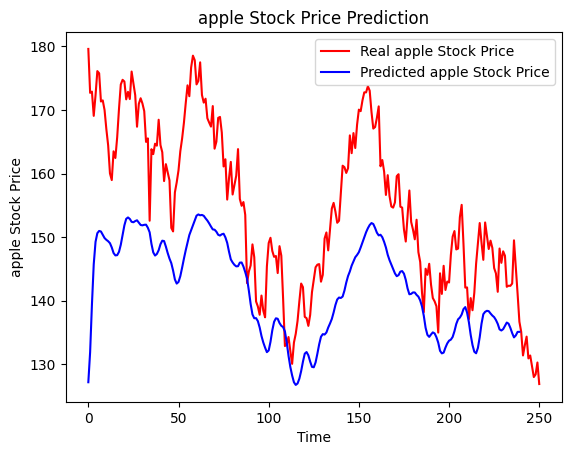

In [46]:
plt.plot(test, color = 'red', label = 'Real apple Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted apple Stock Price')
plt.title('apple Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('apple Stock Price')
plt.legend()
plt.show()